In [1]:
import matplotlib.pyplot as plt

import numpy as np


X = np.load('../Language_digits/X.npy')
Y = np.load('../Language_digits/Y.npy')

X.shape
X
Y.shape
Y


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [2]:
X = np.array(X)
Y = np.array(Y)
print("Shape of train :", X.shape)
print("Shape of label :", Y.shape)

Shape of train : (2062, 64, 64)
Shape of label : (2062, 10)


In [3]:
def plot_digits_colidx(X, Y):
    plt.figure(figsize=(10,10))
    plt.plot([5, 2, 11])
    for i in col_idx:
        ax = plt.subplot(5, 2, i+1)
        ax.set_title("Column_idx: " + str(i))
        plt.axis('off')
        plt.imshow(X[np.argwhere(Y[:,i]==1)[0][0],:])

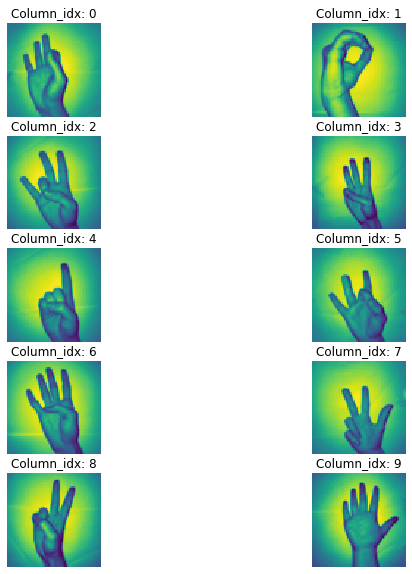

In [4]:
N_classes = Y.shape[1]
col_idx = [i for i in range(N_classes)]
plot_digits_colidx(X, Y)

In [5]:
#dictionary that handles the column index - digit relatinship
colidx_digit = {0: 9,
                1: 0,
                2: 7,
                3: 6,
                4: 1,
                5: 8,
                6: 4,
                7: 3,
                8: 2,
                9: 5}

#digit - column index relationship dictionary
digit_colidx = {v: k for k, v in colidx_digit.items()}

In [6]:
#create empty matrix
Y_ordered = np.zeros(Y.shape)
#fill the matrix so that the columns index also corresponds to the digit
for i in range(N_classes):
    Y_ordered[:, i] = Y[:, digit_colidx[i]]

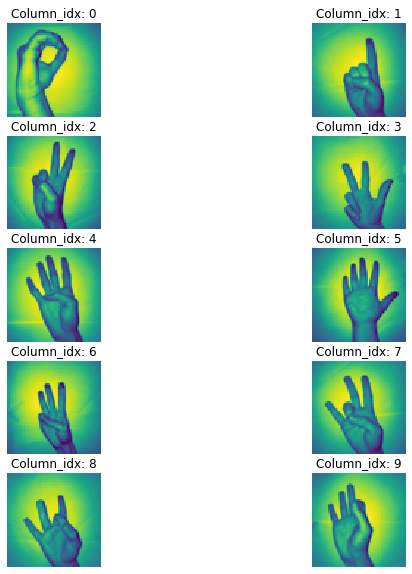

In [7]:
plot_digits_colidx(X, Y_ordered)

## CNN two hidden layers

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,Y_ordered, test_size=0.1, random_state=15)

In [9]:
train_images = np.expand_dims(X_train, axis=3)
val_images = np.expand_dims(X_val, axis=3)
print(train_images.shape)
print(val_images.shape)

(1855, 64, 64, 1)
(207, 64, 64, 1)


In [10]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPooling2D, Conv2D, MaxPooling2D

seed = 7
np.random.seed(seed)
tf.set_random_seed(seed)
#tf.random.set_seed(seed)

model = Sequential([
  Conv2D(8, (3,3), strides=1, input_shape=(64, 64, 1), activation='elu'),
  Conv2D(8, (3,3), strides=1, input_shape=(64, 64, 1), activation='elu'),
  MaxPooling2D(pool_size=(2,2), strides=(2,2)),
  Dropout(0.4),

  Conv2D(16, (3,3), strides=1, input_shape=(64, 64, 1), activation='elu'),
  Conv2D(16, (3,3), strides=1, input_shape=(64, 64, 1), activation='elu'),
  MaxPooling2D(pool_size=(2,2), strides=(2,2)),
  Dropout(0.4),
    
  Conv2D(32, (3,3), strides=1, input_shape=(64, 64, 1), activation='elu'),
  Conv2D(32, (3,3), strides=1, input_shape=(64, 64, 1), activation='elu'),
  MaxPooling2D(pool_size=(2,2), strides=(2,2)),
  Dropout(0.4),
  
  Conv2D(32, (1,1), strides=1, input_shape=(64, 64, 1), activation='elu'),
  Dropout(0.4),  
    
  #Conv2D(10, (1,1), strides=1, input_shape=(64, 64, 1), activation='elu'),  
  
  Flatten(),
  Dense(10, activation='softmax'),  
    
])

C:\Users\Utilisateur\Anaconda3\envs\computervision\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Utilisateur\Anaconda3\envs\computervision\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Utilisateur\Anaconda3\envs\computervision\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Utilisateur\Anacond

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
import keras
# Set Optimizer
#opt = adam(lr=0.001)
learning_rate = 0.01
model.compile(
  'RMSprop',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
  #optimizer=SGD(lr=learning_rate)
)

In [12]:
# ignore Warning
import warnings
warnings.filterwarnings("ignore")

history = model.fit(
  train_images,
  y_train,
  epochs=50,
  validation_data=(val_images, y_val),
  batch_size=X_train.shape[1] #Put 1 to take 64 the dimension of the images
)

Instructions for updating:
Use tf.cast instead.
Train on 1855 samples, validate on 207 samples
Epoch 1/50
1855/1855 [==============================] - 12s 7ms/step - loss: 2.2921 - acc: 0.1315 - val_loss: 2.1128 - val_acc: 0.4783
Epoch 2/50
1855/1855 [==============================] - 10s 6ms/step - loss: 1.8165 - acc: 0.3833 - val_loss: 1.0446 - val_acc: 0.7440
Epoch 3/50
1855/1855 [==============================] - 11s 6ms/step - loss: 1.3404 - acc: 0.5407 - val_loss: 0.8396 - val_acc: 0.8068
Epoch 4/50
1855/1855 [==============================] - 10s 6ms/step - loss: 1.1176 - acc: 0.6146 - val_loss: 0.6841 - val_acc: 0.8164
Epoch 5/50
1855/1855 [==============================] - 11s 6ms/step - loss: 1.0164 - acc: 0.6658 - val_loss: 0.5839 - val_acc: 0.8406
Epoch 6/50
1855/1855 [==============================] - 10s 6ms/step - loss: 0.8835 - acc: 0.7094 - val_loss: 0.5114 - val_acc: 0.8454
Epoch 7/50
1855/1855 [==============================] - 10s 6ms/step - loss: 0.8331 - acc: 0.71

In [13]:
X.shape[1]

64

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 8)         584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
__________

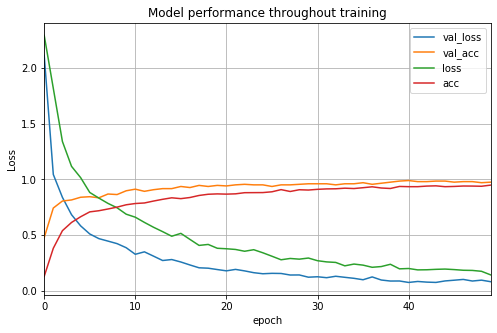

In [15]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [16]:
prediction = model.predict(val_images)
print(np.argmax(prediction, axis=1))

[6 8 2 1 5 8 2 3 0 1 7 9 3 7 5 7 6 4 5 2 1 2 5 7 0 0 6 2 8 3 5 8 5 2 3 4 2
 8 2 7 2 1 4 9 6 2 1 7 4 5 7 6 3 4 2 7 7 0 0 2 0 7 0 9 1 1 8 4 5 6 0 1 4 9
 6 0 2 1 4 6 6 4 7 4 0 2 0 0 8 9 1 8 3 5 6 8 8 5 1 3 1 6 4 5 0 8 0 5 8 9 9
 0 2 3 5 9 5 3 5 9 6 9 1 2 7 4 3 4 9 8 6 3 1 8 9 9 1 8 4 5 3 6 8 5 3 3 7 8
 5 0 2 1 2 7 1 0 8 3 6 5 3 0 5 8 5 5 7 7 6 3 2 2 3 6 3 6 3 8 2 0 0 4 0 8 7
 7 4 5 7 8 1 9 8 0 1 4 9 3 1 0 9 2 2 4 0 6 7]


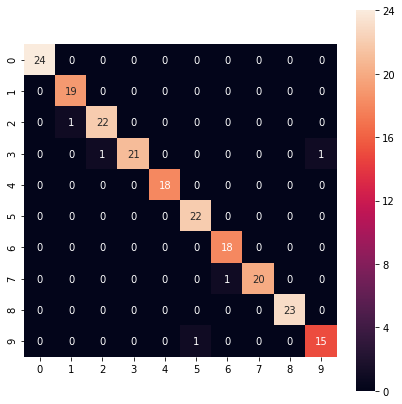

Accuracy: 0.9758454106280193


In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

y_train_class = y_val.argmax(axis=1)
y_pred_class = prediction.argmax(axis=1)
conf_mat = confusion_matrix(y_train_class, y_pred_class)
plt.figure(figsize=(7,7))
sns.heatmap(conf_mat,square=True, annot=True, fmt='.0f')
plt.show()
print('Accuracy:',accuracy_score(y_train_class, y_pred_class))

### Two conv2D=8
Accuracy: 0.8647342995169082

### Last model 
Accuracy: 0.9758454106280193

## CNN K-fold cross validation
https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/

* TO DO: leave only the fit in the loop and put before all the model definition

In [8]:
X = np.expand_dims(X, axis=3)
print(X.shape)

(2062, 64, 64, 1)


In [14]:
import tensorflow as tf
import keras
from keras.layers import Dense
from sklearn.model_selection import KFold
import numpy
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPooling2D, Conv2D, MaxPooling2D

seed = 7
# define 10-fold cross validation test harness
# shuffle=True to mix the data: you have 36 cards, with the random seed state you split always in the same moment: example 10 and 26, with the shuffle=true you mixe before splitting. 
#If the shuffle = False and you leave the random state with seed, you will always have the same datasets.
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(X, Y_ordered):
    
    np.random.seed(seed)
    tf.set_random_seed(seed)
    #tf.random.set_seed(seed)

    model = Sequential()
    model.add(Conv2D(filters=8, kernel_size=(3,3),input_shape=(64,64,1),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=8, kernel_size=(3,3),activation='relu')) #82% avec 16
    model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Dropout(0.3))
    #model.add(MaxPooling2D(pool_size=(4,4)))
    #model.add(Dense(128, activation='relu'))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    
    
    # Set Optimizer
    #opt = adam(lr=0.001)
    model.compile(
      loss='categorical_crossentropy',
      optimizer=keras.optimizers.Adamax(),
      metrics=['accuracy'],
    )
    
    history = model.fit(X[train], Y_ordered[train],epochs=30,verbose=0, validation_data=(X[test], Y_ordered[test]),
      batch_size=X[train].shape[1] #Put 1 to take 64 the dimension of the images
    )
    scores = model.evaluate(X[test], Y_ordered[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

Instructions for updating:
Use tf.cast instead.
acc: 80.19%
acc: 81.64%
acc: 86.41%
acc: 80.58%
acc: 79.61%
acc: 83.50%
acc: 83.01%
acc: 86.41%
acc: 80.10%
acc: 82.52%
82.40% (+/- 2.36%)


### Accuracy with K-fold
acc: 80.19%<br>
acc: 81.64%<br>
acc: 86.41%<br>
acc: 80.58%<br>
acc: 79.61%<br>
acc: 83.50%<br>
acc: 83.01%<br>
acc: 86.41%<br>
acc: 80.10%<br>
acc: 82.52% (+/- 2.36%)